## Observations and Insights

* Capomulin and Ramicane ended the study with the most number of mice. This shows that among all drug regimens, the two have the lowest mortality rate. On the contrary, Propiva has least mice, thus the highest mortality rate compared to other drugs. Further analysis is exhibited by the bar chart below. 
* Gender demographics of the subjects is almost equally distributed with female slightly higher than male. This is further supported by the pie chart below.
* In terms of final tumor volume, consistent with the results shown in the bar graph, Capomulin and Ramicane showed the best results across all drugs. The final tumor volume for both drugs have the lowest values among the top four competing drug regimens. Thus, proving the drugs' ability to effectively decrease the tumor volume size overtime. This is shown further in the box plot below.
* For all mice treated with Capomulin, a positive correlation exists between its average weight and the tumor volume showing the drug's ability to reduce the tumor volume size.

## Dependencies and starter code

In [1]:
# %matplotlib notebook

In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
len(mouse_metadata)

249

In [5]:
# Read the mouse data and the study results
study_results = pd.read_csv(study_results)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
len(study_results)

1893

There are total of 249 mouse subjected for testing. Each mouse has a tumor was measured per five days. Timepoint represents the day number and Tumor Volume represent the tumor size.

In [7]:
# Combine the data into a single dataset

merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
merge_data = merge_data[["Mouse ID", "Timepoint", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Tumor Volume (mm3)", "Metastatic Sites"]]
merge_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [9]:
main_df = merge_data.drop_duplicates(subset=["Mouse ID","Timepoint"], keep="first")
main_df.head(20)

# gender_demo_df.drop_duplicates(subset="SN", keep ="first", inplace=True)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
5,k403,25,Ramicane,Male,21,16,33.464577,1
6,k403,30,Ramicane,Male,21,16,31.099498,1
7,k403,35,Ramicane,Male,21,16,26.546993,1
8,k403,40,Ramicane,Male,21,16,24.365505,1
9,k403,45,Ramicane,Male,21,16,22.050126,1


In [10]:
len(main_df)

1888

## Summary statistics - DONE

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [11]:
# Create stats df
stats_df = main_df[["Drug Regimen", "Tumor Volume (mm3)"]]
stats_df = stats_df.groupby(["Drug Regimen"])

In [12]:
# Compute for mean
mean_df = stats_df.mean()
mean_df = mean_df["Tumor Volume (mm3)"]
mean_df

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Compute for median
median_df = stats_df.median()
median_df = median_df["Tumor Volume (mm3)"]
median_df

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Compute for variance
variance_df = stats_df.var()
variance_df = variance_df["Tumor Volume (mm3)"]
variance_df

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Compute for standard deviation
std_df = stats_df.std()
std_df = std_df["Tumor Volume (mm3)"]
std_df

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
sem_df = stats_df.sem()
sem_df = sem_df["Tumor Volume (mm3)"]
sem_df

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [17]:
stat_table = pd.DataFrame({
                           "Mean": mean_df,
                           "Median": median_df,
                           "Variance": variance_df,
                           "Standard Deviation": std_df,
                          "SEM": sem_df                        
                          })
stat_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

This really means: generate a bar chart showing total number of mice per drug across all time points. You are simply doing a sum per drug, and you do not need to break it down by time point

In [18]:
#Create bar graph data source
bar_data = main_df[["Mouse ID", "Timepoint", "Drug Regimen"]]
bar_data

,Mouse ID,Timepoint,Drug Regimen
0,k403,0,Ramicane
1,k403,5,Ramicane
2,k403,10,Ramicane
3,k403,15,Ramicane
4,k403,20,Ramicane
...,...,...,...
1888,z969,25,Naftisol
1889,z969,30,Naftisol
1890,z969,35,Naftisol
1891,z969,40,Naftisol


In [19]:
bar_df = bar_data.groupby("Drug Regimen")[["Mouse ID"]].count().reset_index()
bar_df = bar_df.rename(columns={"Drug Regimen": "Drug Regimen", "Mouse ID": "Mouse Count"})
bar_df

,Drug Regimen,Mouse Count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [20]:
drug_name = bar_df["Drug Regimen"]
drug_name

0    Capomulin
1     Ceftamin
2    Infubinol
3     Ketapril
4     Naftisol
5      Placebo
6     Propriva
7     Ramicane
8     Stelasyn
9    Zoniferol
Name: Drug Regimen, dtype: object

In [21]:
mouse_count = bar_df["Mouse Count"]
mouse_count

0    230
1    178
2    178
3    188
4    186
5    181
6    156
7    228
8    181
9    182
Name: Mouse Count, dtype: int64

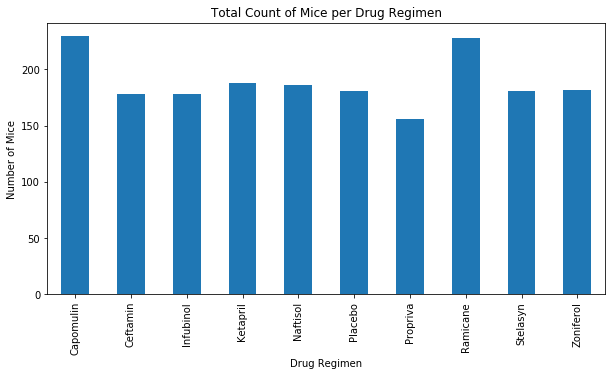

In [22]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas


bar_df.plot(kind="bar", x="Drug Regimen", y="Mouse Count", figsize = (10,5), legend=None)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Count of Mice per Drug Regimen")
plt.show()


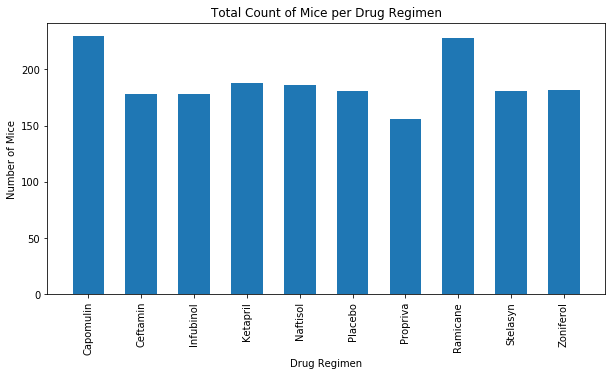

In [23]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(10,5))
plt.bar(bar_df["Drug Regimen"], bar_df["Mouse Count"], width=0.6)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Count of Mice per Drug Regimen")
plt.show()


## Pie plots

In [24]:
pie_data = mouse_metadata[["Sex", "Mouse ID"]]
pie_data

,Sex,Mouse ID
0,Male,k403
1,Female,s185
2,Female,x401
3,Male,m601
4,Male,g791
...,...,...
244,Female,z314
245,Female,z435
246,Female,z581
247,Female,z795


In [25]:
gender = pie_data["Sex"].unique()
gender

array(['Male', 'Female'], dtype=object)

In [26]:
pie_df = pie_data.groupby(["Sex"])[["Mouse ID"]].count()
pie_df.head()

,Mouse ID
Sex,
Female,124
Male,125


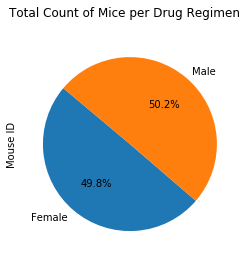

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pan_pie_df = pie_df

pan_pie_df.plot(kind="pie", subplots = True, autopct="%1.1f%%", title = "Total Count of Mice per Drug Regimen", startangle=140, legend=None)
plt.show()


Text(0.5, 1.0, 'Total Count of Mice per Drug Regimen')

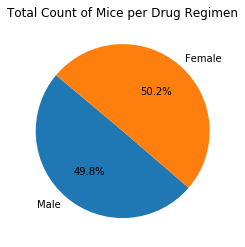

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
py_pie_df = pie_df
labels = gender
sizes = py_pie_df["Mouse ID"]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle = 140)
plt.title("Total Count of Mice per Drug Regimen")


## Quartiles, outliers and boxplots

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

* Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

In [29]:
# Source data
box_data = main_df
box_data.head(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
5,k403,25,Ramicane,Male,21,16,33.464577,1
6,k403,30,Ramicane,Male,21,16,31.099498,1
7,k403,35,Ramicane,Male,21,16,26.546993,1
8,k403,40,Ramicane,Male,21,16,24.365505,1
9,k403,45,Ramicane,Male,21,16,22.050126,1


In [30]:
# Find the last timepoint for each Mouse
box_data_df = box_data.groupby("Mouse ID")[["Timepoint"]].max().reset_index()
box_data_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [55]:
# Match that timepoint to a drug regiment and a tumor volume

box_merge = pd.merge(box_data_df, main_df, on=["Mouse ID", "Timepoint"], how="inner")
box_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [32]:
# Top 4 drugs Capomulin, Ramicane, Infubinol and Ceftamin
# Drop other drugs
box_merge_2 = box_merge.replace(["Ketapril", "Naftisol", "Placebo", "Propriva", "Stelasyn", "Zoniferol"],0)
box_merge_2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,0,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,0,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,0,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,0,Female,13,29,65.741070,3


In [56]:
# # Get names of indexes for which column Drug Regimen has value of 0
drop_drug_df = box_merge_2[box_merge_2["Drug Regimen"] == 0 ].index

# Delete these row indexes from dataFrame
drop_drug_df = box_merge_2.drop(drop_drug_df)
drop_drug_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [57]:
# Create final table ready for plotting
new_box_df = drop_drug_df[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
box_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


* Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens
* Top 4 drugs Capomulin, Ramicane, Infubinol and Ceftamin

In [35]:
# Capomulin
capo = new_box_df.loc[new_box_df["Drug Regimen"] == "Capomulin"]

capo_tumor_vol = capo["Tumor Volume (mm3)"]
quartiles = capo_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Capomulin")
print("-------------------------------------------------")
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Capomulin
-------------------------------------------------
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [36]:
# Capomulin Outliers (Above Upper Bound)
capo.loc[capo["Tumor Volume (mm3)"] > upper_bound]

,Drug Regimen,Mouse ID,Tumor Volume (mm3)


In [37]:
# Capomulin Outliers (Below Lower Bound)
capo.loc[capo["Tumor Volume (mm3)"] < lower_bound]


,Drug Regimen,Mouse ID,Tumor Volume (mm3)


In [38]:
# Ramicane
rami = new_box_df.loc[new_box_df["Drug Regimen"] == "Ramicane"]

rami_tumor_vol = rami["Tumor Volume (mm3)"]
quartiles = rami_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Ramicane")
print("-------------------------------------------------")
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ramicane
-------------------------------------------------
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [39]:
# Ramicane Outliers (Above Upper Bound)
rami.loc[rami["Tumor Volume (mm3)"] > upper_bound]

,Drug Regimen,Mouse ID,Tumor Volume (mm3)


In [40]:
# Ramicane Outliers (Below Lower Bound)
rami.loc[rami["Tumor Volume (mm3)"] < lower_bound]

,Drug Regimen,Mouse ID,Tumor Volume (mm3)


In [41]:
# Infubinol
infu = new_box_df.loc[new_box_df["Drug Regimen"] == "Infubinol"]

rami_tumor_vol = infu["Tumor Volume (mm3)"]
quartiles = rami_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Infubinol")
print("-------------------------------------------------")
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Infubinol
-------------------------------------------------
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [42]:
# Infubinol Outliers (Above Upper Bound)
infu.loc[infu["Tumor Volume (mm3)"] > upper_bound]

,Drug Regimen,Mouse ID,Tumor Volume (mm3)


In [43]:
# Infubinol Outliers (Below Lower Bound)
infu.loc[infu["Tumor Volume (mm3)"] < lower_bound]

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
31,Infubinol,c326,36.321346


In [44]:
# Ceftamin
ceft = new_box_df.loc[new_box_df["Drug Regimen"] == "Ceftamin"]

ceft_tumor_vol = ceft["Tumor Volume (mm3)"]
quartiles = ceft_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Ceftamin")
print("-------------------------------------------------")
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ceftamin
-------------------------------------------------
The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [45]:
# Ceftamin Outliers (Above Upper Bound)
ceft.loc[ceft["Tumor Volume (mm3)"] > upper_bound]

,Drug Regimen,Mouse ID,Tumor Volume (mm3)


In [46]:
# Ceftamin Outliers (Below Lower Bound)
ceft.loc[ceft["Tumor Volume (mm3)"] < lower_bound]

,Drug Regimen,Mouse ID,Tumor Volume (mm3)


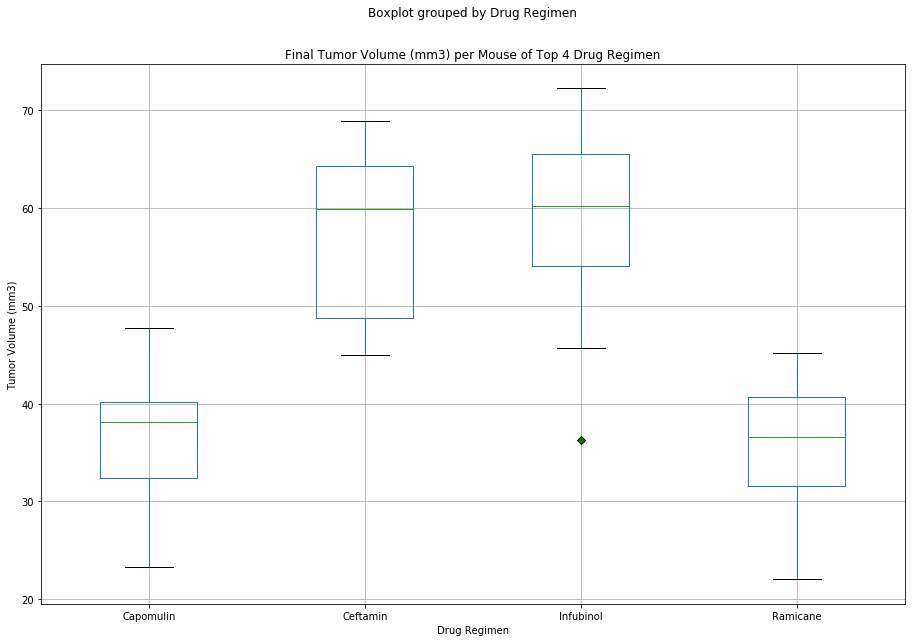

In [47]:
# Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and 
# highlight any potential outliers in the plot by changing their color and style.

green_diamond = dict(markerfacecolor='g', marker='D')
boxplot = new_box_df.boxplot(by="Drug Regimen", figsize=(15,10), flierprops=green_diamond)
plt.title('Final Tumor Volume (mm3) per Mouse of Top 4 Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

* Use mouse ID l509  for the line and scatter plots
* Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
* Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.


In [48]:
# Get data of Mouse l509

mouse = main_df.loc[main_df["Mouse ID"] == "l509"]
mouse

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
371,l509,0,Capomulin,Male,17,21,45.000000,0
372,l509,5,Capomulin,Male,17,21,45.851193,0
373,l509,10,Capomulin,Male,17,21,46.759074,0
374,l509,15,Capomulin,Male,17,21,47.488599,1
375,l509,20,Capomulin,Male,17,21,48.070452,2
376,l509,25,Capomulin,Male,17,21,44.006257,2
377,l509,30,Capomulin,Male,17,21,44.708055,2
378,l509,35,Capomulin,Male,17,21,40.207289,2
379,l509,40,Capomulin,Male,17,21,40.770813,2
380,l509,45,Capomulin,Male,17,21,41.483008,3


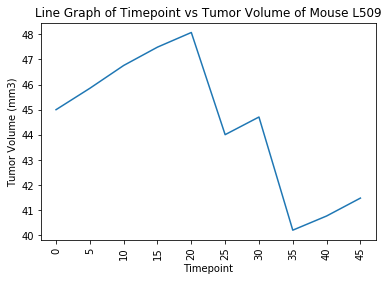

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_values = mouse["Timepoint"]
y_values = mouse["Tumor Volume (mm3)"]
plt.plot(x_values, y_values)
plt.xticks(x_values, rotation=90)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Line Graph of Timepoint vs Tumor Volume of Mouse L509")
plt.show()

In [51]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen
capomulin = main_df.loc[main_df["Drug Regimen"] == "Capomulin"]
capomulin.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
10,s185,0,Capomulin,Female,3,17,45.000000,0
11,s185,5,Capomulin,Female,3,17,43.878496,0
12,s185,10,Capomulin,Female,3,17,37.614948,0
13,s185,15,Capomulin,Female,3,17,38.177232,0
14,s185,20,Capomulin,Female,3,17,36.866876,0


In [52]:
grpby = capomulin.groupby(["Mouse ID"]).mean()
grpby.head()

,Timepoint,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,22.5,9.0,22.0,41.963636,0.7
b742,22.5,7.0,21.0,40.083699,0.0
f966,10.0,16.0,17.0,36.505973,0.0
g288,22.5,3.0,19.0,41.990097,0.8
g316,22.5,22.0,22.0,44.613344,1.0


In [53]:
ave_vol = grpby[["Weight (g)", "Tumor Volume (mm3)"]]
ave_vol

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


The correlation between both factors is 0.84


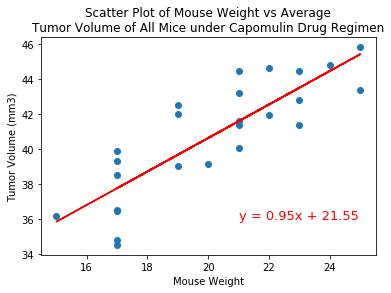

In [63]:
# Create scatter plot

x_values = ave_vol["Weight (g)"]
y_values = ave_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,36),fontsize=13,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Scatter Plot of Mouse Weight vs Average\nTumor Volume of All Mice under Capomulin Drug Regimen")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()